In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [ ]:
dataframe = pd.DataFrame()
dataframe['X'] = X.reshape(100)
dataframe['y'] = y

In [ ]:
dataframe

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


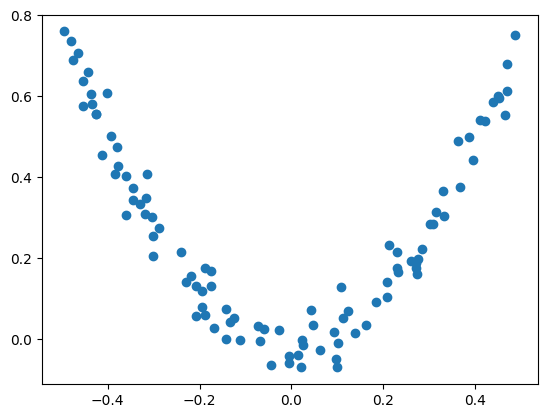

In [ ]:
plt.scatter(dataframe['X'], dataframe['y'])
plt.show()

In [ ]:
dataframe['pred1'] = dataframe['y'].mean()
dataframe

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [ ]:
dataframe['residual_1'] = dataframe['y'] - dataframe['pred1']
dataframe

,X,y,pred1,residual_1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


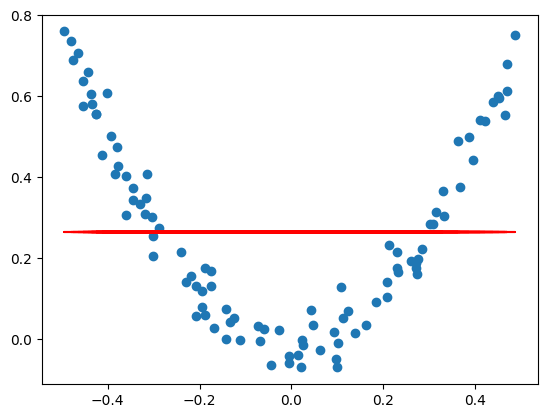

In [ ]:
plt.scatter(dataframe['X'], dataframe['y'])
plt.plot(dataframe['X'], dataframe['pred1'], color='red')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(dataframe['X'].values.reshape(100, 1), dataframe['residual_1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

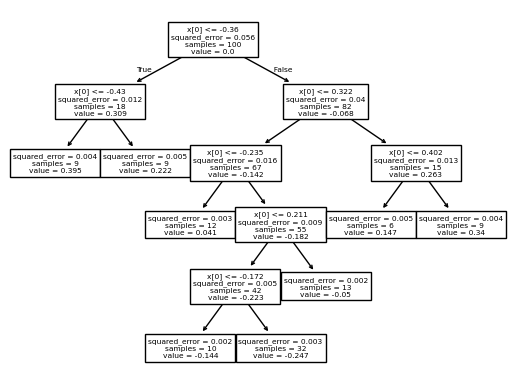

In [ ]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

Result of test set

In [ ]:
X_test = np.linspace(-0.5, 0.5, 500)
X_test

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397,
       -0.48997996, -0.48797595, -0.48597194, -0.48396794, -0.48196393,
       -0.47995992, -0.47795591, -0.4759519 , -0.4739479 , -0.47194389,
       -0.46993988, -0.46793587, -0.46593186, -0.46392786, -0.46192385,
       -0.45991984, -0.45791583, -0.45591182, -0.45390782, -0.45190381,
       -0.4498998 , -0.44789579, -0.44589178, -0.44388778, -0.44188377,
       -0.43987976, -0.43787575, -0.43587174, -0.43386774, -0.43186373,
       -0.42985972, -0.42785571, -0.4258517 , -0.4238477 , -0.42184369,
       -0.41983968, -0.41783567, -0.41583166, -0.41382766, -0.41182365,
       -0.40981964, -0.40781563, -0.40581162, -0.40380762, -0.40180361,
       -0.3997996 , -0.39779559, -0.39579158, -0.39378758, -0.39178357,
       -0.38977956, -0.38777555, -0.38577154, -0.38376754, -0.38176353,
       -0.37975952, -0.37775551, -0.3757515 , -0.37374749, -0.37174349,
       -0.36973948, -0.36773547, -0.36573146, -0.36372745, -0.36

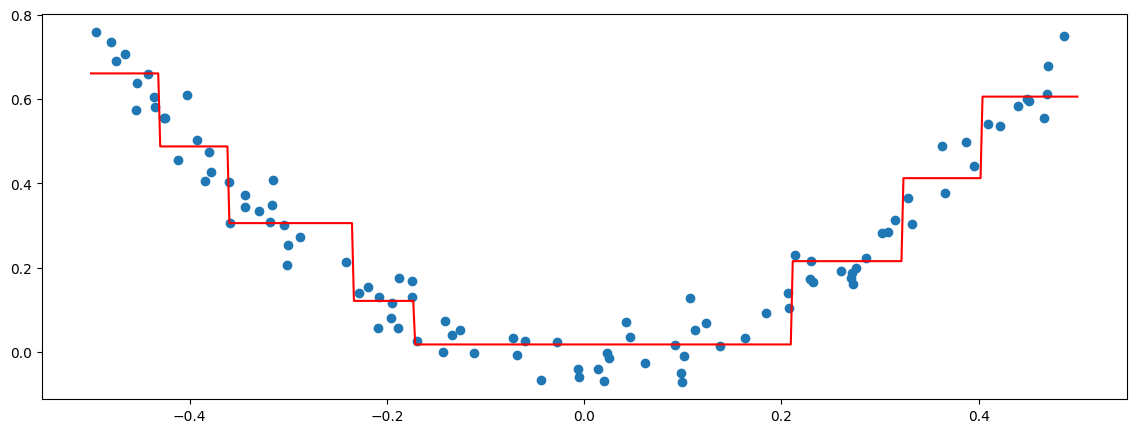

In [ ]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500,1)) # combined result of model m1 and model m2


plt.figure(figsize=(14, 5))
plt.plot(X_test, y_pred, color='red')
plt.scatter(dataframe['X'], dataframe['y'])

In [ ]:
dataframe['pred2'] = 0.265458 + 0.1 * tree1.predict(dataframe['X'].values.reshape(100, 1)) # to avoid the overfitting
dataframe

,X,y,pred1,residual_1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.240744
1,0.450714,0.594480,0.265458,0.329021,0.299501
2,0.231994,0.166052,0.265458,-0.099407,0.260491
3,0.098658,-0.070178,0.265458,-0.335636,0.240744
4,-0.343981,0.343986,0.265458,0.078528,0.269509
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.240744
96,0.022733,-0.002305,0.265458,-0.267763,0.240744
97,-0.072459,0.032809,0.265458,-0.232650,0.240744
98,-0.474581,0.689516,0.265458,0.424057,0.305003


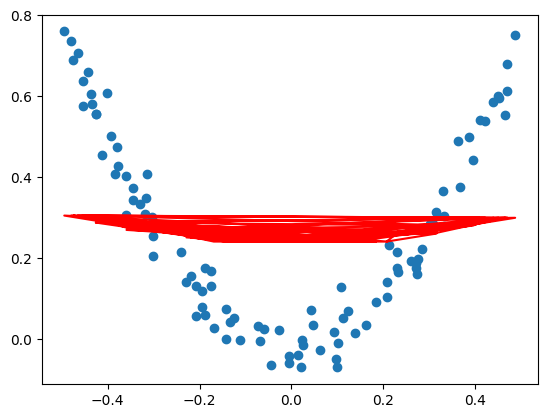

In [ ]:
plt.scatter(dataframe['X'], dataframe['y'])
plt.plot(dataframe['X'], dataframe['pred2'], color='red')

Add one more column and do the appropriate evaluation of residual_2 and pred3 and check the results via visualization on test set and on the original data as well.

Do the implementation on sklearn.diabetes data and apply GradientBoostingRegressor on it.